# Paractica 12: Análisis de texto con nltk y wordcloud.

Primero importamos la libreria ntlk, que se utiliza para obtener informacion del procesamiento del lenguaje naural.

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} nltk

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       he774522_2         4.8 MB
    ------------------------------------------------------------
                                           Total:         4.8 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  nltk                                             anaconda --> pkgs/main
  openssl                                          anaconda --> pkgs/main




openssl-1.1.1d       | 4.8 MB    |            |   0% 
openssl-1.1.1d       | 4.8 MB    |            |   0% 
openssl-1.1.1d       | 4.8 MB    | 4          |   4% 
openssl-1.1.1d       | 4.8 MB    | 5          |   6% 
openssl-1.1.1d       | 4.8 MB    | #          |  10% 
openssl-1.1.1d  

El siguiente paso es importar toda las bases de datos necesarias para para poder realizar nuestro trabajo. Importamos la libreria ssl y por parte de nltk importamos el paquete de datos punkt, stopwords y vader_lexion.

In [2]:
import nltk
import ssl
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
print(stopwords.words("english")[:10])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer() # en inglés hasta podemos distinguir entre palabras positivas y negativas
print(s.polarity_scores('useless'))
print(s.polarity_scores('marvelous'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carlm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carlm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\carlm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Con la liberia pandas, intanciamos en la variable 'd' nuestra base de datos. Y con el comando head mostramos como estan distribuidos los datos.

In [4]:
import pandas as pd
d = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/wine-reviews/wine-rev.csv")
d.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Ahora que hemos cargado la base de datos. Pasaremos a normalizar los datos.

Crearemos una clase con informacion de contry, description y variety con el nombre de solo-rev. Esto con la finalidad de limpiar o separar la informacion de interes.

In [6]:
header = ['country', 'description', 'variety']
d.to_csv('solo-rev.csv', columns = header)
e = pd.read_csv('solo-rev.csv')
e.head(4)

,Unnamed: 0,country,description,variety
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",White Blend
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,2,US,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Riesling


In [7]:
e.drop(e.columns[[0]], axis=1, inplace=True)
e.head(2)

,country,description,variety
0,Italy,"Aromas include tropical fruit, broom, brimston...",White Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Portuguese Red


Ahora que tenemos nuestra base de datos normalizada. Obtendremos los datos unicos con el fin de identificar los datos de interes con los que podemos trabajar.

In [8]:
e['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [9]:
e.to_csv('s-rev.csv', index=False)
read = pd.read_csv('s-rev.csv')
read.head(2)

,country,description,variety
0,Italy,"Aromas include tropical fruit, broom, brimston...",White Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Portuguese Red


Ya que tenemos nuestra base de datos normalizada y acomodada la cargamos nuevamente con pandas. 

In [12]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
pr = pd.read_csv('rev-solo.csv', header = None)
pr.head(3)

,0,1,2
0,Aromas include tropical fruit broom brimstone ...,Italy,White Blend
1,This is ripe and fruity a wine that is smooth ...,Portugal,Portuguese Red
2,Tart and snappy the flavors of lime flesh and ...,US,Pinot Gris


Con el head mostramos como una tabla para verificar la nueva distribucion de los datos.

A continuacion realizaremos un experimiento, que mostrara las palabras mas repetidas o frecuentes, en los atributos de description, country y variety.

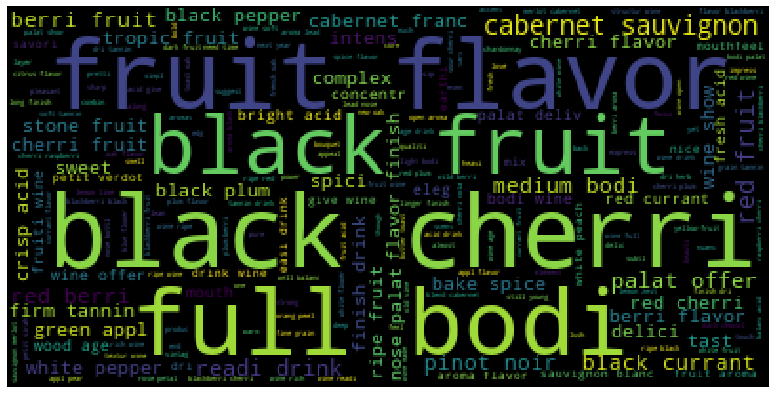

In [13]:
pr.columns = ['description', 'country', 'variety']
n = len(pr)
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = pr.description[r]
    reemplazo = ''
    if original != 'NaN':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
pr['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

Las palabras mas grandes representan las palabras con mayor frecuencia utlizadas en los atributos que utilizamos para nuestro experimento. Pero tambien podemos apreciar que la mayoria de estas palabras son nombres de los sabores de los vinos. Esto nos serviria si queremos obtener informacion a nivel global, es decir, de todos los paises de la base de datos.

Ahora bien, si necesitamos obtener inofrmacion de un pais en especifico. Es necesario crear clases, el motivo es limpiar informacion que no nos sea util. Esto consitira en crear una base de datos nueva por cada parametro de interes, con el fin de otener un fracmento de la base de datos ya normalizada solo-rev pero esta vez solo con informacion del pais de interes. No es necesario hacerlo de un pais. Pero para este ejemplo asi lo manejaremos.

Obtendremos las clases de los paises (US, Italy y Portugal).

Creamos clase para conutry == US y le llamaremos us-wine.

In [14]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'US']
writer.to_csv('us-wine.csv', columns = header, index=False)

lol = pd.read_csv('us-wine.csv')
lol.head(4)

,description,country,variety
0,"Tart and snappy, the flavors of lime flesh and...",US,Pinot Gris
1,"Pineapple rind, lemon pith and orange blossom ...",US,Riesling
2,"Much like the regular bottling from 2012, this...",US,Pinot Noir
3,"Soft, supple plum envelopes an oaky structure ...",US,Cabernet Sauvignon


Creamos clase para conutry == Italy y le llamaremos italy-wine.

In [15]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'Italy']
writer.to_csv('italy-wine.csv', columns = header, index=False)

lol = pd.read_csv('italy-wine.csv')
lol.head(4)

,description,country,variety
0,"Aromas include tropical fruit, broom, brimston...",Italy,White Blend
1,"Here's a bright, informal red that opens with ...",Italy,Frappato
2,This is dominated by oak and oak-driven aromas...,Italy,Nerello Mascalese
3,Delicate aromas recall white flower and citrus...,Italy,White Blend


Creamos clase para conutry == Portugal y le llamaremos portugal-wine.

In [16]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'Portugal']
writer.to_csv('portugal-wine.csv', columns = header, index=False)

lol = pd.read_csv('portugal-wine.csv')
lol.head(4)

,description,country,variety
0,"This is ripe and fruity, a wine that is smooth...",Portugal,Portuguese Red
1,"Grown on the sandy soil of Tejo, the wine is t...",Portugal,Touriga Nacional
2,"This bottling shows a rich, wood-aged wine, fu...",Portugal,Portuguese White
3,"From an estate in the south of the Alentejo, t...",Portugal,Portuguese Red


Cargamos nuestras clases o bases de datos clasificadas usando Pandas. Y pasamos al siguiente experimento, cuyo objetivo es el mismo que el ejercico global. Pero con la inofmracion de cada una de las clases. Es decir estamos reduciendo nuestro espacio muestral, para poder obtener informacion solo de US, Italy y Portugal.

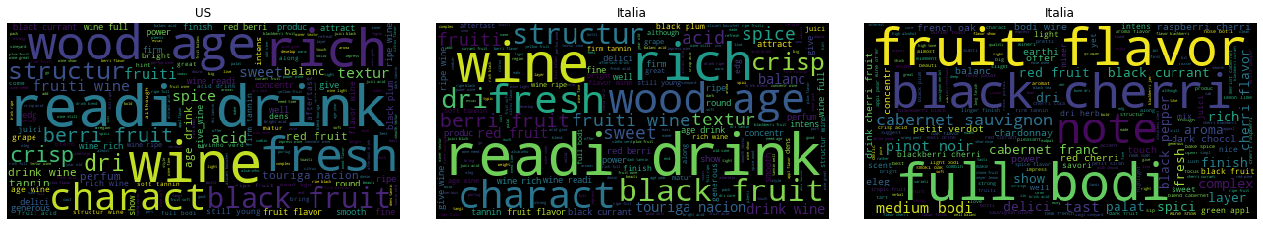

In [18]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
dini = pd.read_csv("portugal-wine.csv", header = None)
dmcu = pd.read_csv("us-wine.csv", header = None)
dord = pd.read_csv("italy-wine.csv", header = None)
cols = ['description', 'country', 'variety']
dini.columns = cols
dmcu.columns = cols
dord.columns = cols
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["Portugal", "US", "Italia"]
i = 1
for d in [dini, dmcu, dord]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.description[r]
        reemplazo = ''
        if original != 'NaN':
            quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in lbls:
        sf = plt.subplot(3, 3, i)
        i += 1
        texto = ' '.join(reemplazos)
        sf.set_title(tipo)
        nube = WordCloud().generate(texto)
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()


Siguiendo los pasos del ejemplo se tienen tres mapas de texto diferentes. En estos casos ya se puede apreciar una diferencia notoria en cada uno, dejando más claro cuales son las características que los distinguen de los demás países